In [1]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("data_clean.csv", index_col=0)
df.head()

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,67,5,1,2010,67,S
2,36.0,118.0,8.0,72,5,2,2010,72,C
3,12.0,149.0,12.6,74,5,3,2010,74,PS
4,18.0,313.0,11.5,62,5,4,2010,62,S
5,NaN,NaN,14.3,56,5,5,2010,56,S


In [3]:
df.shape


(158, 9)

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.dtypes

Ozone      float64
Solar.R    float64
Wind       float64
Temp C      object
Month       object
Day          int64
Year         int64
Temp         int64
Weather     object
dtype: object

## Data type conversion

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158 entries, 1 to 158
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Temp C   158 non-null    object 
 4   Month    158 non-null    object 
 5   Day      158 non-null    int64  
 6   Year     158 non-null    int64  
 7   Temp     158 non-null    int64  
 8   Weather  155 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 12.3+ KB


In [7]:
df.isnull().sum()

Ozone      38
Solar.R     7
Wind        0
Temp C      0
Month       0
Day         0
Year        0
Temp        0
Weather     3
dtype: int64

In [8]:
df["Month"]=pd.to_numeric(df["Month"], errors="coerce")
df["Temp C"] = pd.to_numeric(df["Temp C"], errors="coerce")
df["Weather"] = df["Weather"].astype("category")
df["Wind"] = df["Wind"].astype("int64")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158 entries, 1 to 158
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Ozone    120 non-null    float64 
 1   Solar.R  151 non-null    float64 
 2   Wind     158 non-null    int64   
 3   Temp C   157 non-null    float64 
 4   Month    157 non-null    float64 
 5   Day      158 non-null    int64   
 6   Year     158 non-null    int64   
 7   Temp     158 non-null    int64   
 8   Weather  155 non-null    category
dtypes: category(1), float64(4), int64(4)
memory usage: 11.4 KB


## Duplicates

In [10]:
df[df.duplicated()].shape

(1, 9)

In [11]:
df[df.duplicated()]

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
157,14.0,191.0,14,75.0,9.0,28,2010,75,S


In [12]:
df_clean1 = df.drop_duplicates()

In [13]:
df_clean1.duplicated().sum().any()

False

In [14]:
df_clean1.shape

(157, 9)

In [15]:
df_clean2 = df_clean1.drop("Temp C", axis=1)

In [16]:
df_clean2.head()

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
1,41.0,190.0,7,5.0,1,2010,67,S
2,36.0,118.0,8,5.0,2,2010,72,C
3,12.0,149.0,12,5.0,3,2010,74,PS
4,18.0,313.0,11,5.0,4,2010,62,S
5,NaN,NaN,14,5.0,5,2010,56,S


In [17]:
df_clean3 = df_clean2.rename(columns = {"Solar.R":"Solar"})

In [18]:
df_clean3.head()

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
1,41.0,190.0,7,5.0,1,2010,67,S
2,36.0,118.0,8,5.0,2,2010,72,C
3,12.0,149.0,12,5.0,3,2010,74,PS
4,18.0,313.0,11,5.0,4,2010,62,S
5,NaN,NaN,14,5.0,5,2010,56,S


## Outlier detection

## Histogram of the numeric variables

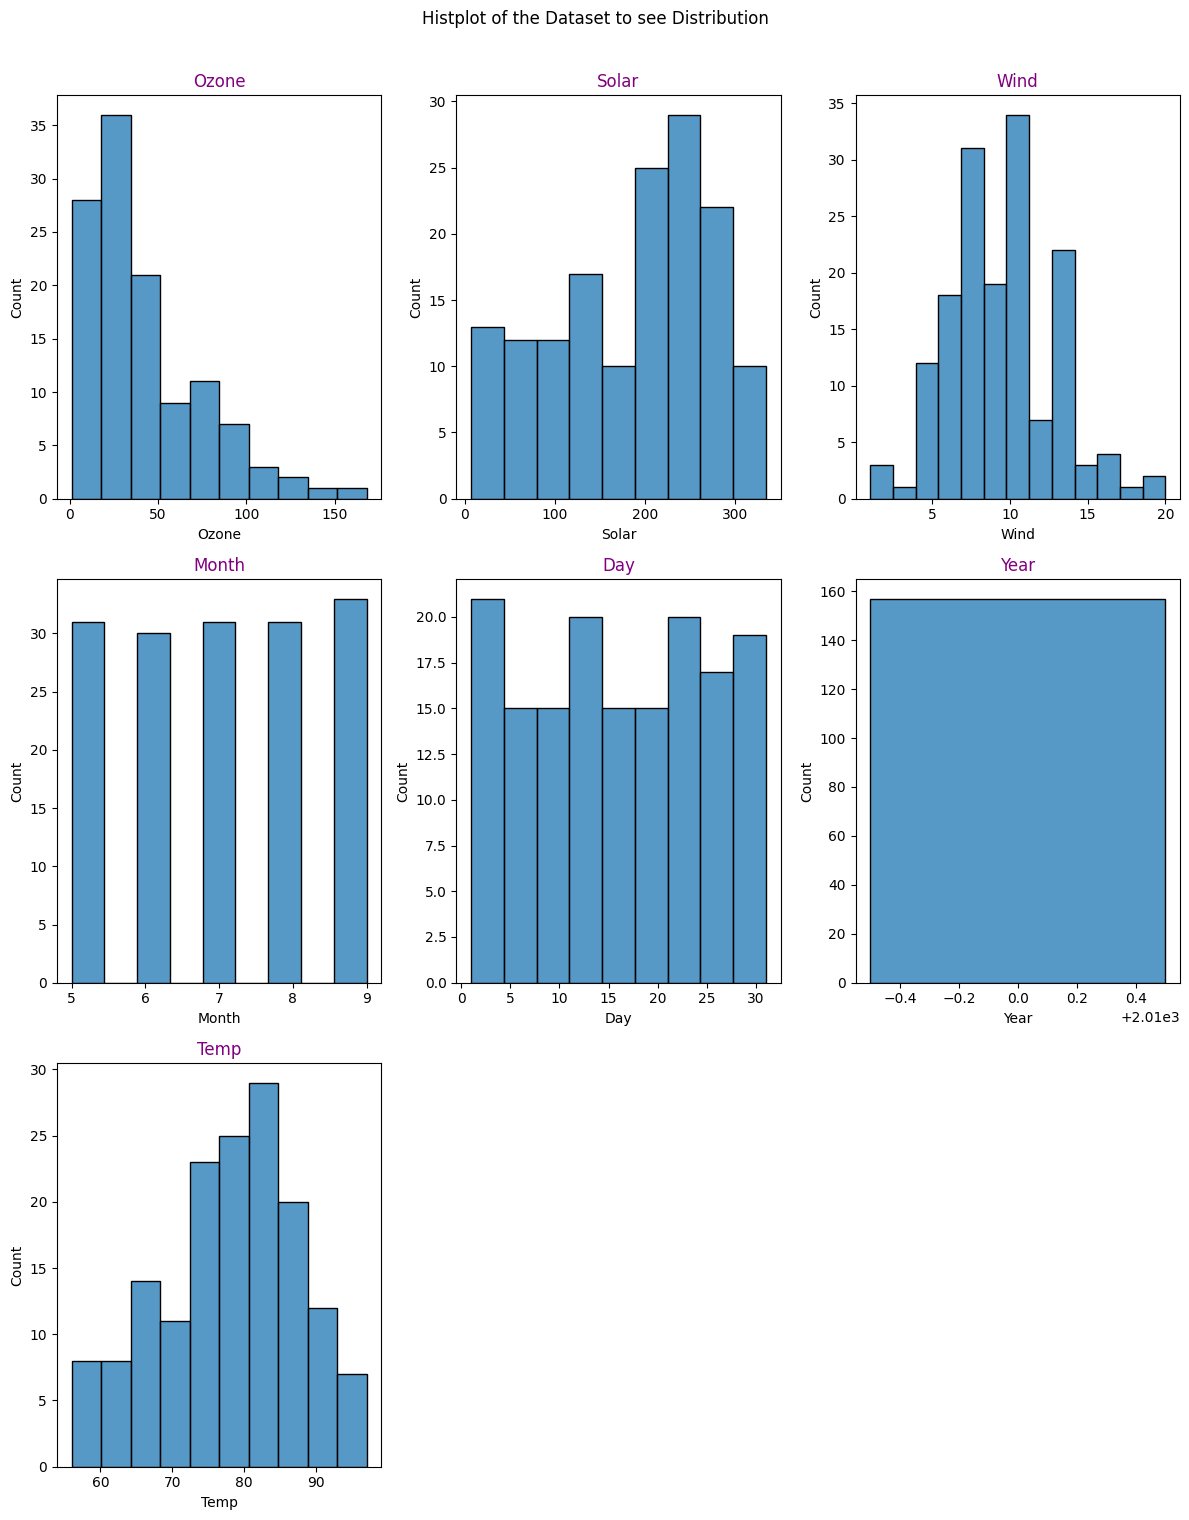

In [19]:
fig = plt.figure(figsize=(12,15))
fig.suptitle('Histplot of the Dataset to see Distribution', y=1.01)
for i in range(0, df_clean3.select_dtypes(exclude=['object','category']).shape[1]):
    ax = fig.add_subplot(3,3,i+1)
    sns.histplot(df_clean3[df_clean3.select_dtypes(exclude=['object','category']).columns[i]])
    ax.set_title(df_clean3.select_dtypes(exclude=["object","category"]).columns[i],color="purple")
plt.tight_layout()
plt.show()

## Boxplot

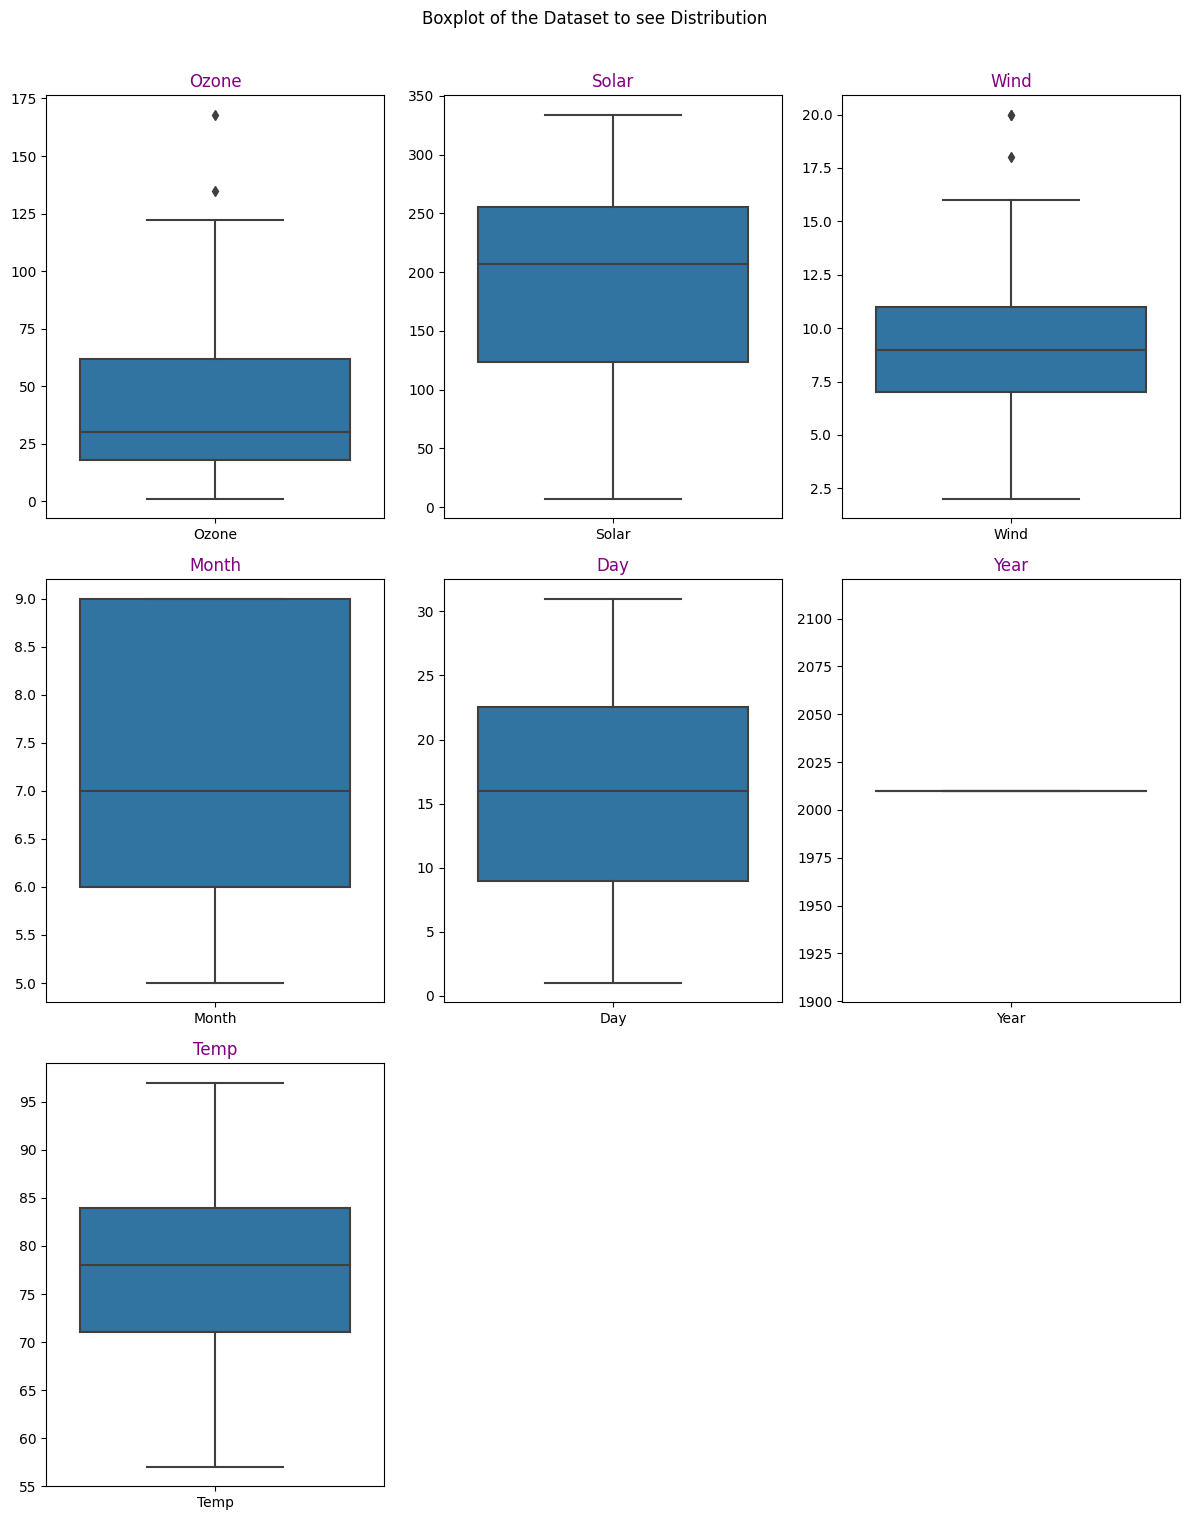

In [20]:
df_box = df_clean3.dropna()
fig = plt.figure(figsize=(12,15))
fig.suptitle('Boxplot of the Dataset to see Distribution', y=1.01)
for i in range(0, df_box.select_dtypes(exclude=['object','category']).shape[1]):
    ax = fig.add_subplot(3,3,i+1)
    sns.boxplot(df_box[[df_clean3.select_dtypes(exclude=['object','category']).columns[i]]])
    ax.set_title(df_box.select_dtypes(exclude=["object","category"]).columns[i],color="purple")
plt.tight_layout()
plt.show()

In [21]:
df_clean3.Ozone.describe()

count    119.000000
mean      41.815126
std       32.659249
min        1.000000
25%       18.000000
50%       31.000000
75%       62.000000
max      168.000000
Name: Ozone, dtype: float64

In [22]:
df_clean3.Wind.describe()

count    157.000000
mean       9.452229
std        3.476009
min        1.000000
25%        7.000000
50%        9.000000
75%       11.000000
max       20.000000
Name: Wind, dtype: float64

<Axes: xlabel='Weather', ylabel='count'>

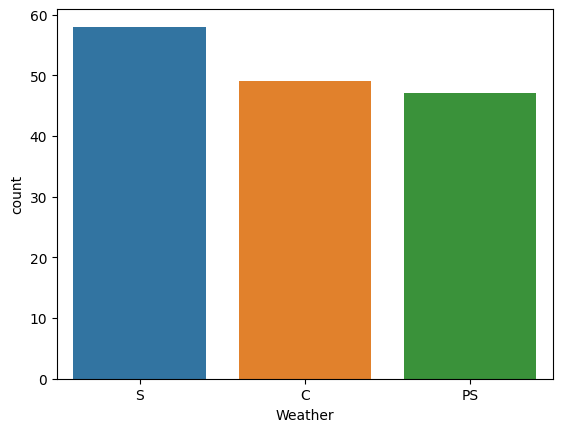

In [23]:
sns.countplot(x = "Weather", data = df_clean3, order = df_clean3.Weather.value_counts().index)

## Missing values and Imputation

<Axes: >

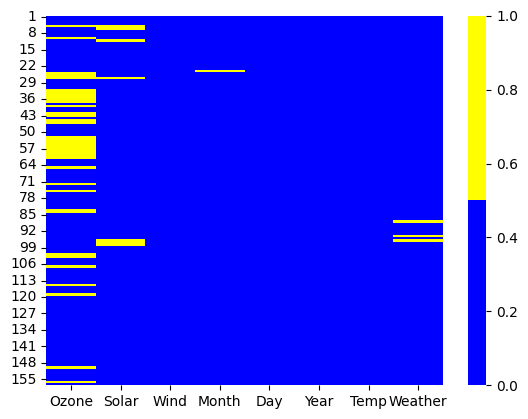

In [24]:
cols = df_clean3.columns
colours  = ['blue','yellow']
sns.heatmap(df_clean3.isnull(), cmap = sns.color_palette(colours))

In [25]:
df_clean3[df_clean3.isnull().any(axis=1)].head()

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
5,NaN,NaN,14,5.0,5,2010,56,S
6,28.0,NaN,14,5.0,6,2010,66,C
10,NaN,194.0,8,5.0,10,2010,69,S
11,7.0,NaN,6,5.0,11,2010,74,C
24,32.0,92.0,12,NaN,24,2010,61,C


In [26]:
df_clean3.isnull().sum()

Ozone      38
Solar       7
Wind        0
Month       1
Day         0
Year        0
Temp        0
Weather     3
dtype: int64

In [27]:
# missing imputation using mean for numeric variable

mean_ozone = df_clean3['Ozone'].mean()
print(mean_ozone)

41.81512605042017


In [28]:
mean_solar = df_clean3['Solar'].mean()
print(mean_solar)

185.36666666666667


In [29]:
df_clean3['Ozone'] = df_clean3['Ozone'].fillna(mean_ozone)

In [30]:
df_clean3['Solar'] = df_clean3['Solar'].fillna(mean_solar)

In [31]:
df_clean3.head()

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
1,41.000000,190.000000,7,5.0,1,2010,67,S
2,36.000000,118.000000,8,5.0,2,2010,72,C
3,12.000000,149.000000,12,5.0,3,2010,74,PS
4,18.000000,313.000000,11,5.0,4,2010,62,S
5,41.815126,185.366667,14,5.0,5,2010,56,S


In [32]:
# missing imputation for categorical variable
mode_weather = df_clean3['Weather'].mode()
#df_clean3["Weather"]=

In [33]:
mode_weather

0    S
Name: Weather, dtype: category
Categories (3, object): ['C', 'PS', 'S']

In [38]:
df_clean3['Weather'] = df_clean3['Weather'].fillna(mode_weather.iloc[0])

In [39]:
df_clean3.isnull().sum()

Ozone      0
Solar      0
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    0
dtype: int64